## Task Highlights :

Perform Supervised Machine Learning on Disease Prediction dataset https://www.kaggle.com/datasets/tna2doan/19037876-ml-deseaseprediction

Perform data visualization

Make use of different algorithms to predict target label

Show 3 different algorithms' accuracies with the help of graphs

The main problems that this data science task is supposed to solve have been correctly framed in terms of the client's goals, background information, and the task's purpose. This makes sure that the task is understood and looked into so that the decision-making process can be better informed about the different ways to solve the problems.

This work will harvest case study data that is relevant, representative, and adequate from a credible and dependable web source. To provide trustworthy and acceptable results and outputs, appropriate preprocessing modifications and data exploration will be conducted on the data. The popular classifier models of Decision Tree, Random Forest, Logistic Regression, K Nearest Neighbor and SVM will be fitted, analysed, and evaluated in terms of the performance metrics of accuracy, precision, recall, and F1-score in predicting disease classifications during the data mining and modelling process. All relevant interpretations and observations will be recorded and taken into account for future enhancements.

Keeping in mind the goal of this task, the main focus will be on disease-related factors, which are a set of symptoms that can be represented by a number between 0 and 1. By looking at these, we can find areas of concern and predict how the disease will progress.

## Data Collection

The first step of a data science task is to obtain, gather, and measure the necessary and targeted data from available internal or external data sources, and then compiled into an established system. In this case, version 1 of Disease Prediction dataset by 19037876 in Kaggle is used. The Excel csv file that was extracted as at 1 April 2021 for the purpose of this task is available at
https://www.kaggle.com/datasets/tna2doan/19037876-ml-deseaseprediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python 
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


### Content
* [Import Data](#1)
* [Data Cleaning](#2)
* [KNN](#3)
    * [Model Complexity](#4)
    * [Cross Validation](#5)
* [Decision Tree Classifier](#6)
* [Random Forest Classifier](#7)
* [Support Vector Classifier](#8)
* [Logistic Regression](#9)
* [Metrics](#10)

<a id = "1"></a>
#### Import Data

* First look at data
* We must read our csv files from directory

In [2]:
data_dir = "../input/disease-prediction-using-machine-learning"
train_df = pd.read_csv(data_dir + "/Training.csv")
test_df = pd.read_csv(data_dir + "/Testing.csv")
train_df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

The dataframe format type will facilitate the use of a wider variety of syntax and methods for data analysis, including describe() and info().

Regarding the attributes included in Disease Prediction dataset, there are 132 different disease symptoms, the first 3 recorded being 'itching', 'skin rash', and 'nodal skin eruptions'. The target class label is 'prognosis'.

## Data Preprocessing

Data preprocessing is a type of data mining that turns raw data into a format that is easy to understand. This process has four main steps: cleaning the data, putting the data together, changing the data, and getting rid of some of the data.

Data cleaning will filter, find, and deal with bad data to make sure that both the data and the analysis results are good. In this case, there may be noises of impossible and extreme values, outliers, and missing values. There might be data that isn't right or attributes and data that are repeated.

As the first step, the dataset's null values will be found and, if possible, replaced with correct values.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


There are 4920 samples and 134 features in the dataset. First we have to dive into deeper of the data so we can completely understand it. The data is clean and balanced so we dont need to handle with missing values, outliers etc. Just one column will be dropped below stages of this kernel

In [4]:
# display 30-60. indices of columns. 
train_df.columns[30:60]

Index(['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine',
       'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
       'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
       'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements'],
      dtype='object')

In [5]:
# all of these are encoded data and types are integer.
train_df["indigestion"]

0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Name: indigestion, Length: 4920, dtype: int64

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

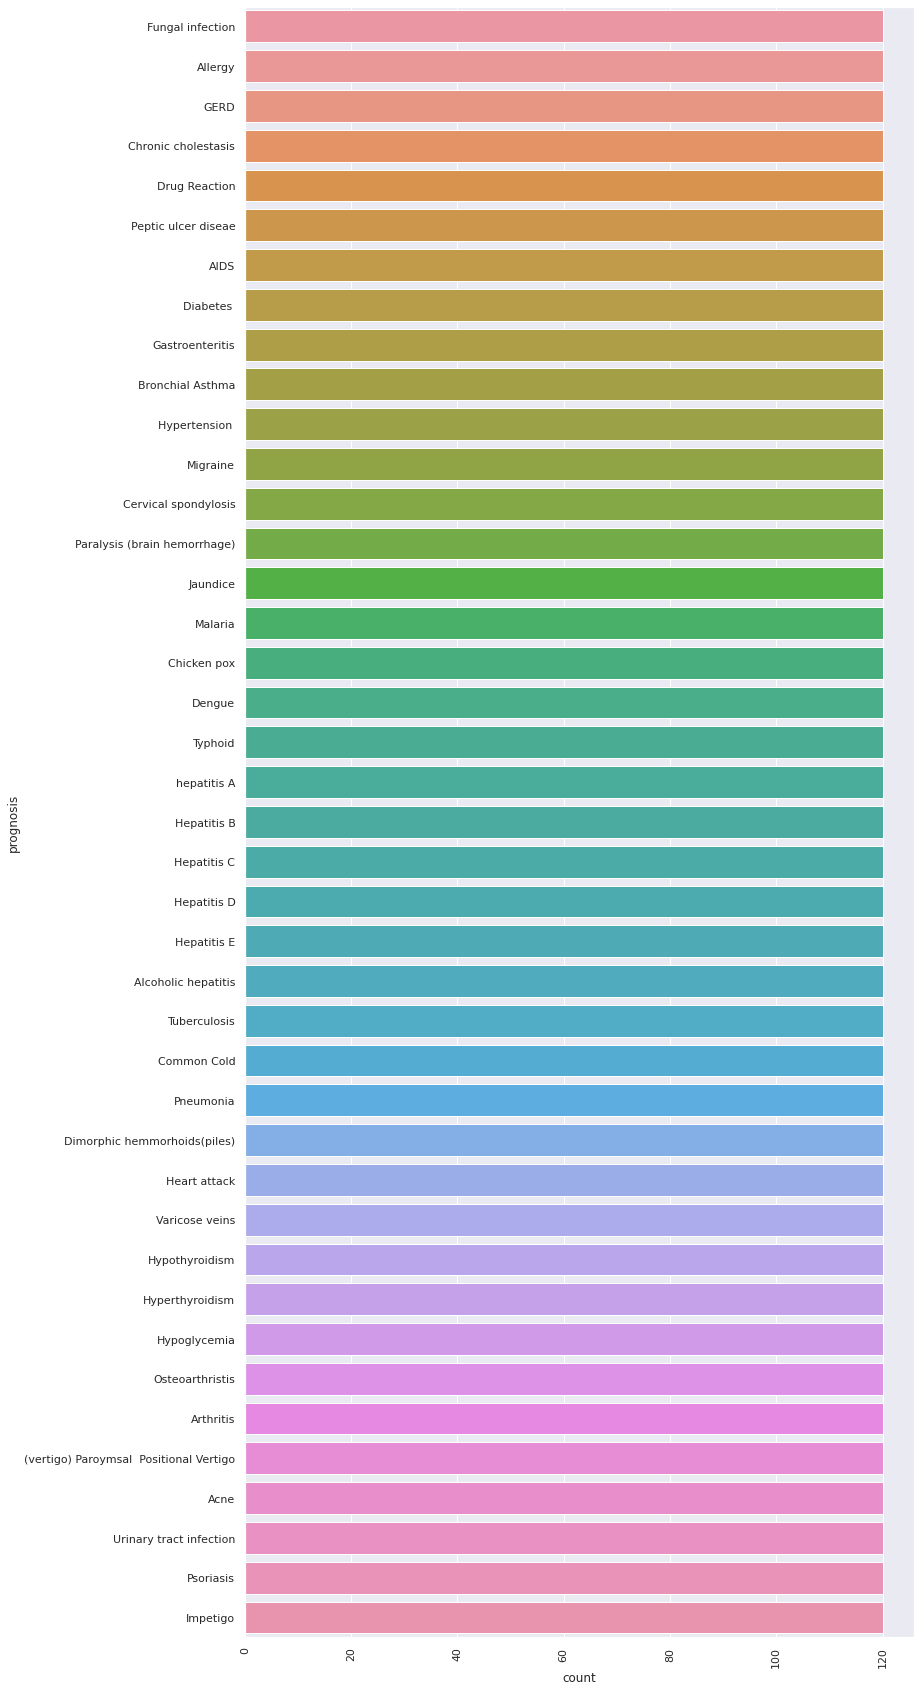

In [7]:
# the data is balanced for classification training. lets see value counts and also visualize them
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="prognosis", data=train_df)
print(train_df["prognosis"].value_counts())

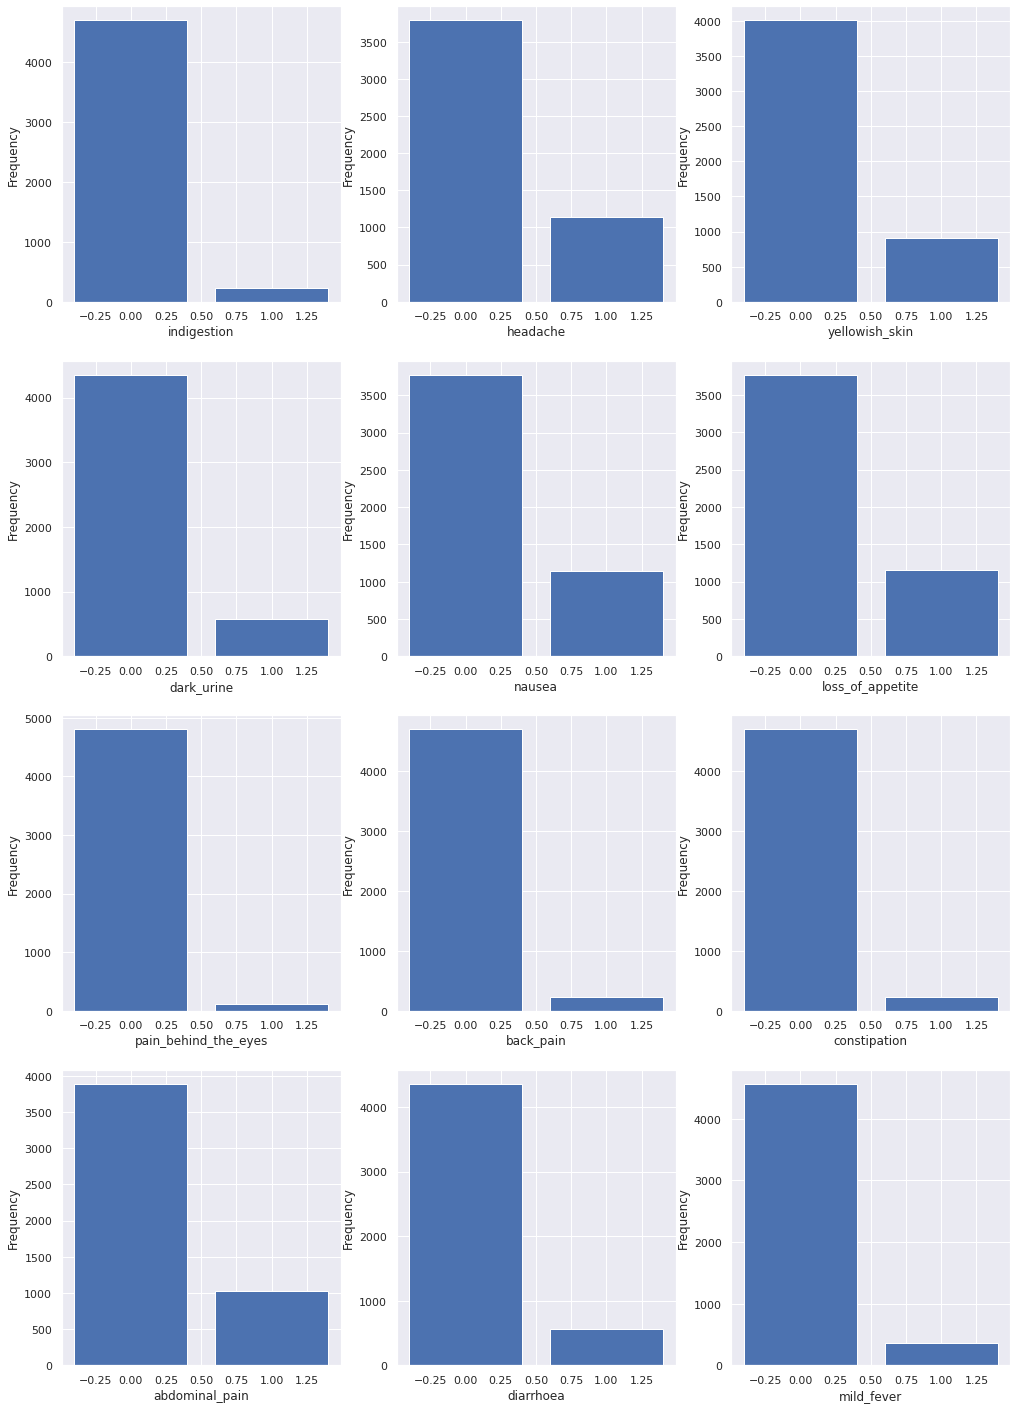

In [8]:
# lets visualize some of features
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']

plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    plt.bar(train_df[feature].value_counts().index.to_numpy(), train_df[feature].value_counts().values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

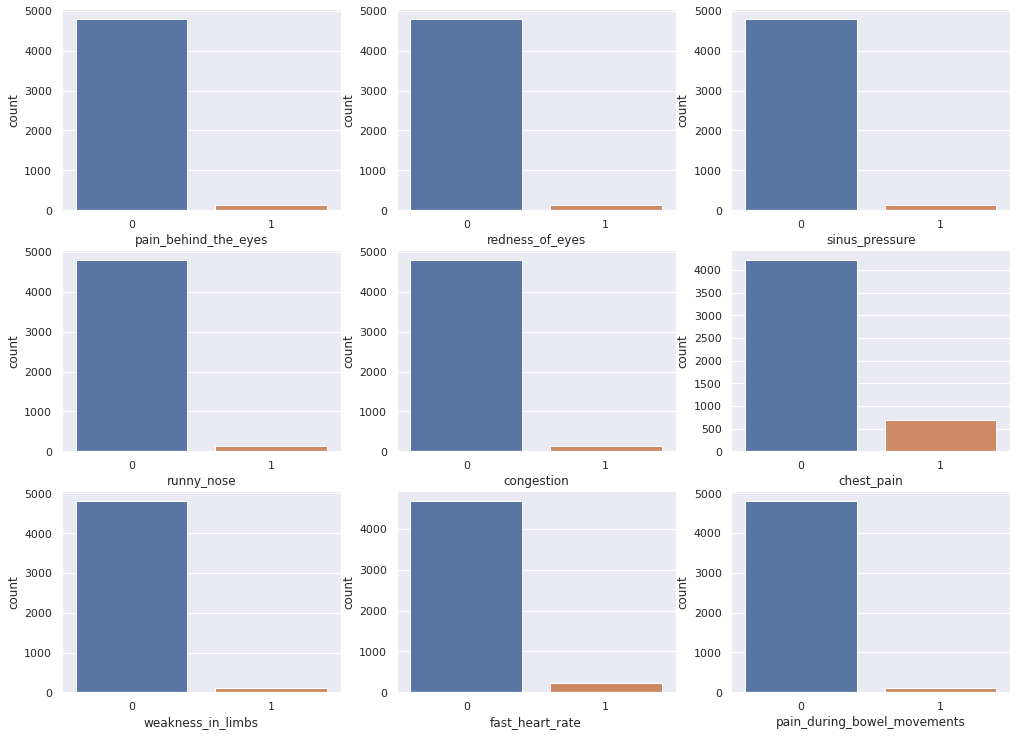

In [9]:
# visualize it with seaborn library one more time
features = ['pain_behind_the_eyes', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements']

plt.figure(figsize = (17,17))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature, data = train_df)
    plt.xlabel(feature)
plt.show()

All occurences of symptoms are mostly absent, which is expected for a Disease Prognosis case study.

For these quantitative binary attributes of symptoms, their linear relationships and their strengths can be compared using a correlation heatmap.

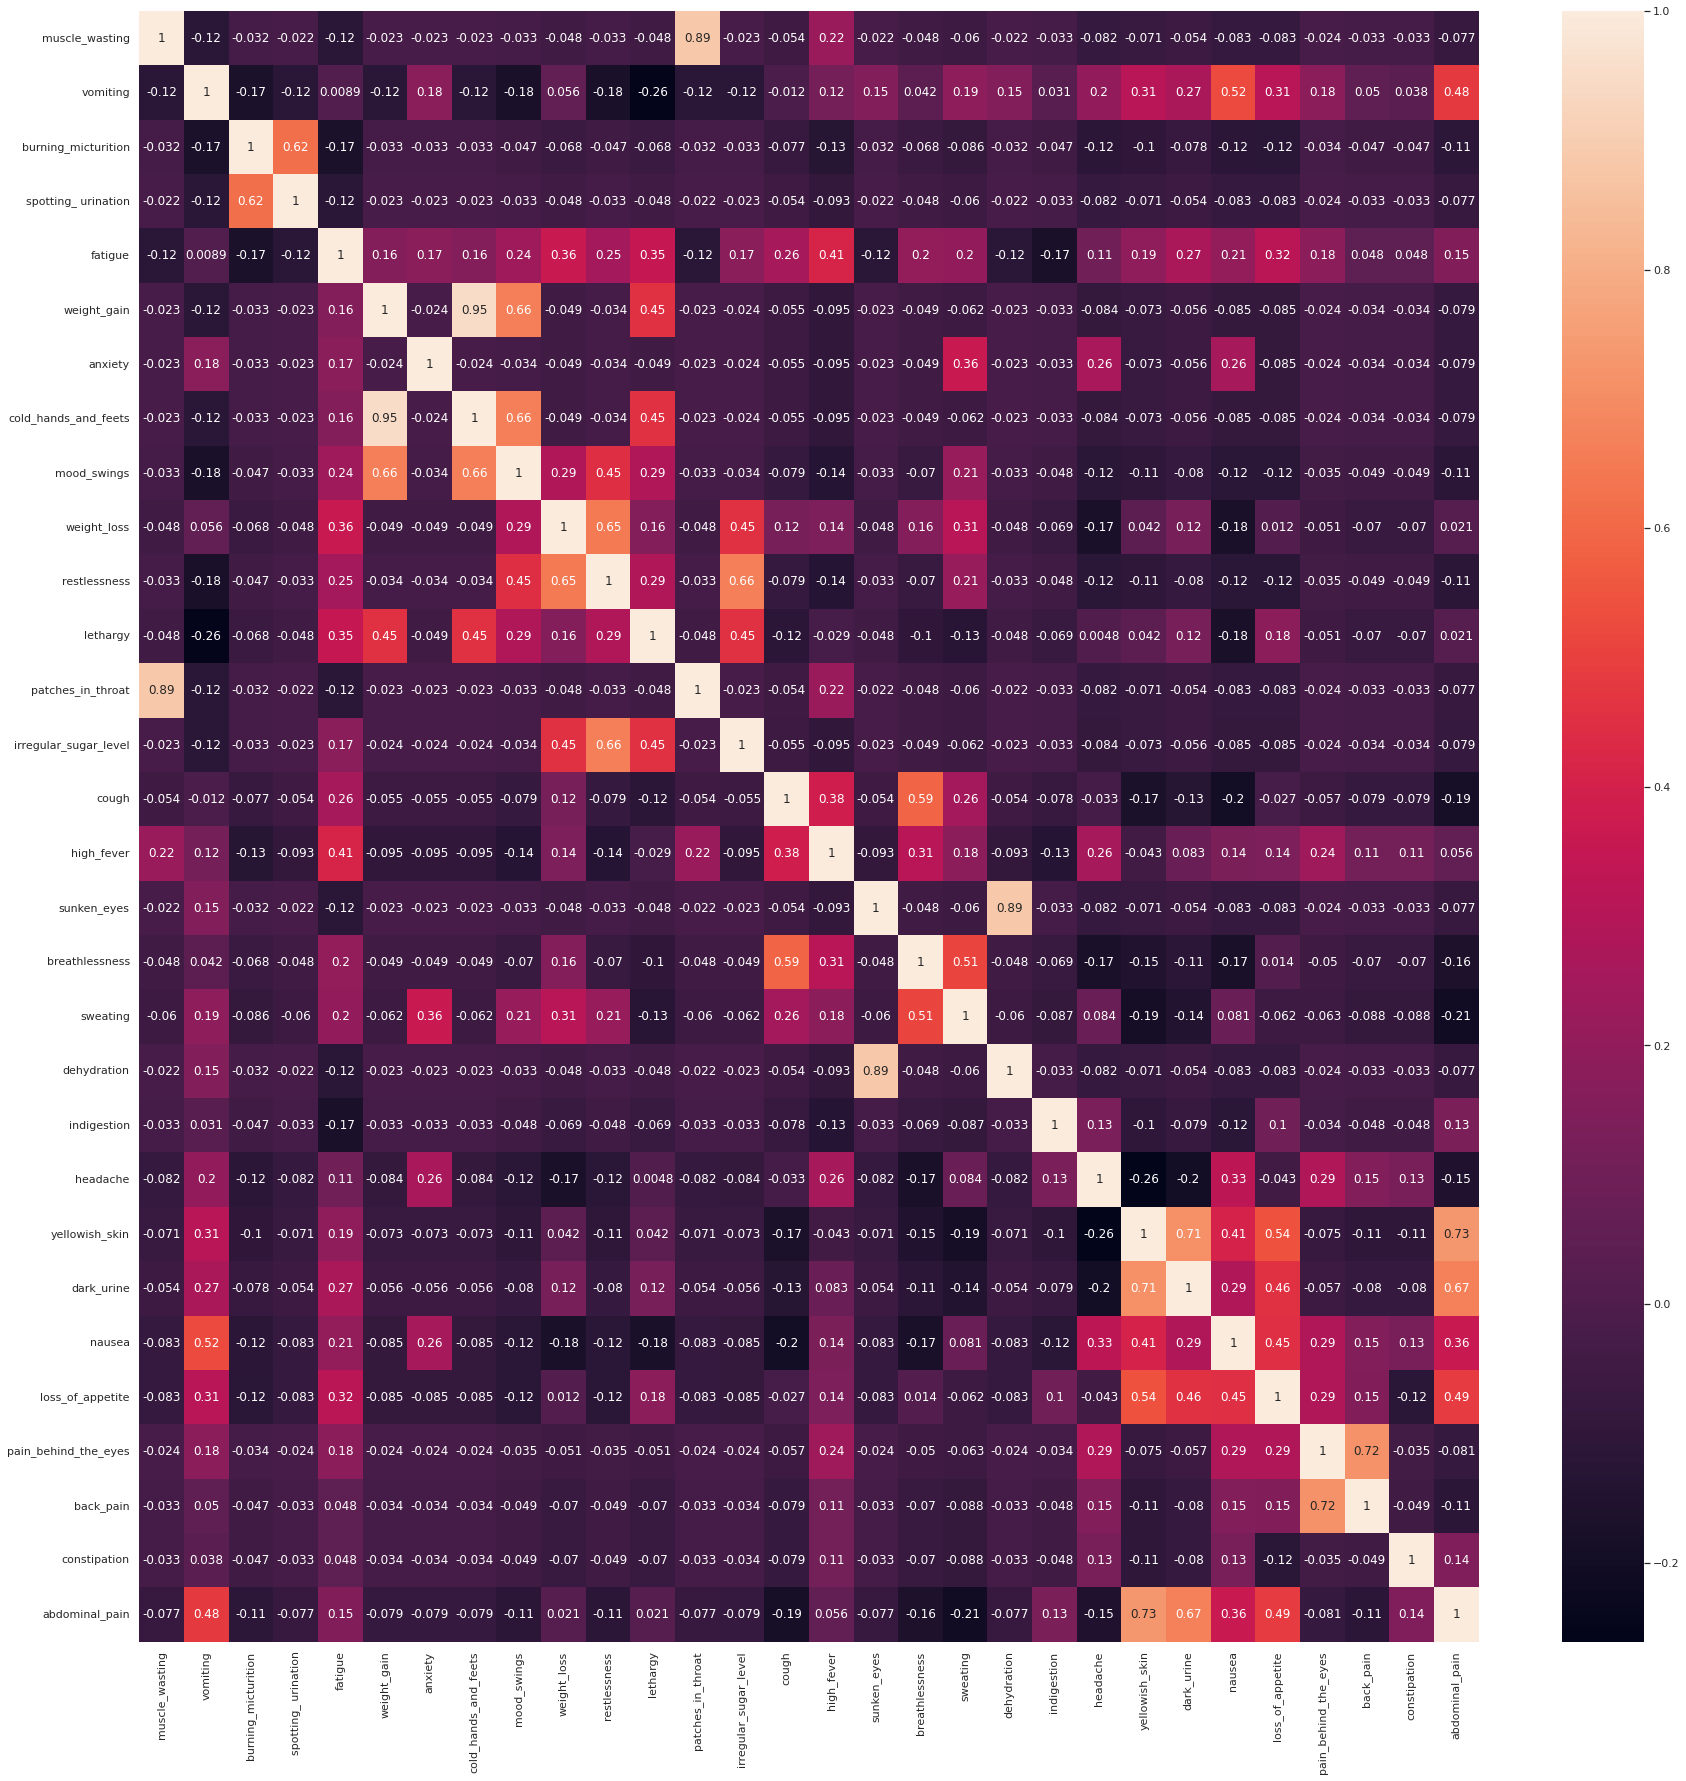

In [10]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = train_df.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

as we look at from correlation map, we can infer these:
* yellowish skin and abdominal pain have a high correlation coefficent which means these features usually seem together (maybe a liver problem)
* cough and breathlessness also have high correlation (it's usual because lung diseases give the same symptoms)
* restlessness and irregular sugar usually seem together

<a id = "2"></a>
#### Data Cleaning

In [11]:
# drop unnamed feature from train data
train_df.drop("Unnamed: 133", axis = 1, inplace = True)
# train_df["Unnamed: 133"]  # it's not here anymore

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [13]:
train_df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In summary, the datasets contain records for 133 predictors or independent or explanatory attributes, and an attribute for class label. The predictors all have discrete binary data values and no missing data values.

describe() is used to obtain summary statistics including measures of central tendency such as mean and median, and measures of dispersion such as standard deviation, which are useful in providing a quick and simple description of the dataset and its characteristics.



#### Now let's create our Machine Learning models
<a id = "3"></a>


## Data Modelling

The training set and the test set are the two sets that make up the two datasets. They both have the same attributes, but their values are different. The classification models are trained and built with the help of the training set. The test set is used to predict the classifications of new, unbiased data that wasn't used to train the model. Based on the accuracy, precision, recall, and F1-score of those classifications, the model's performance is then judged.

The number of target class labels in each dataset is almost the same. It is assumed that the training and test sets are fair and accurate representations of the target classes. For example, they may have already been split randomly using a list of random numbers starting from a randomly chosen position. There are 4920 times in the training subset, but only 43 times in the test subset.

 For the Logistic Regression, K Nearest Neighbor and SVM, information patterns are fed into the model through the input units. These patterns then trigger the many layers of hidden units, which send the information to the output units. The output is the values that were worked out for the nodes in the output layer.

The Decision tree is built using the parameters of the best split strategy and the entropy criterion, which uses information gain to choose the next node based on which features are more important. This improves the quality of the splits. There can't be more than 1 leaves at most. The decision tree is used to get the rules for classifying things. These are decided by the order in which the flow goes from the root node and its branches to the internal or decision nodes. The flow stops when it gets to the leaf node, which is the class label.

Random Forest classifier will combine multiple base models of Decision Trees during its training period, using the strategy of ensemble machine learning methods. This will construct a single optimal predictive model, with the criterion of entropy which utilises information gain to iteratively select the next node according to higher feature importance to optimise the quality of splits. The minimum number of leaves are restricted to 1. The final output may be the mode class or the mean prediction of individual trees.

In [14]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # k = 5
x_train, y_train = train_df.loc[:,train_df.columns != "prognosis"], train_df.loc[:,"prognosis"]
x_test, y_test = test_df.loc[:,train_df.columns != "prognosis"], test_df.loc[:,"prognosis"]
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=5) accuracy is: ",knn.score(x_test, y_test))

Prediction list: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A']
With KNN (K=5) accuracy is:  1.0


## Model Evaluation
The model performance is evaluated and validated by using the test set of 43 records to predict the classifications of these new unbiased data that were not used to train the model. The confusion matrix is then used to determine the performance metrics of accuracy, precision, recall, and F1-score, based on those classifications. The supports are 1 instance for each target class label of prognosis. This process ensures that the models are useful by being generalisable even when the specific training data used is extended to include new test data, or in technical terms ‘avoid over fitting’.

<a id = "4"></a>
#### Model Complexity

In fact, this dataset doesnt requires tuning, but I want to try basics of complex modelling

In [15]:
neighbors = np.arange(1,25)   # for k tuning
train_accuracy = []
test_accuracy = []
# Loop for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 25 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the knn
    knn.fit(x_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

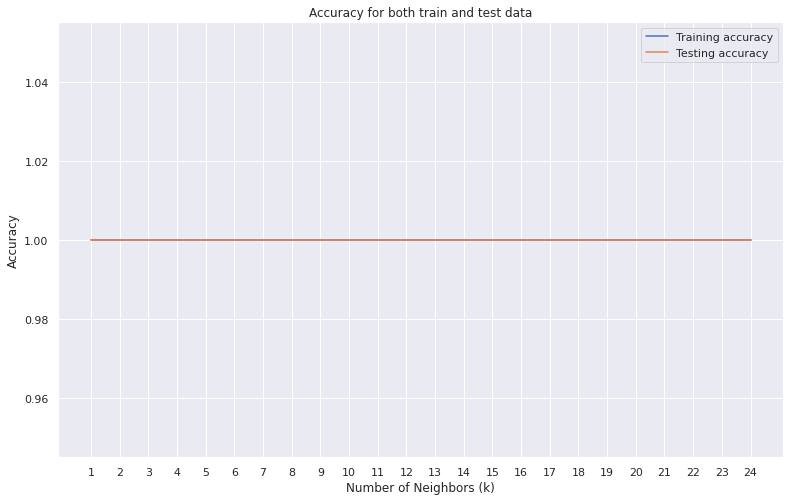

In [16]:
# Plot the accuracies
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title("Accuracy for both train and test data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

<a id = "5"></a>
#### Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
k = 5 # for K-fold cross validation
cv_result = cross_val_score(knn, x_train, y_train, cv = k) # uses R^2 score
print("CV scores: ", cv_result)
print("CV scores average: ", np.sum(cv_result)/len(cv_result))

CV scores:  [1. 1. 1. 1. 1.]
CV scores average:  1.0


<a id = "6"></a>
#### Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)
dt.predict(x_test)
dt.score(x_test, y_test)

0.9761904761904762

<a id = "7"></a>
#### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
rfc.fit(x_train, y_train)
rfc.predict(x_test)
rfc.score(x_test, y_test)

0.9761904761904762

<a id = "8"></a>
#### Support Vector Classifier

In [20]:
from sklearn.svm import SVC
svc = SVC(gamma = "auto", kernel = "rbf" )
svc.fit(x_train, y_train)
svc.predict(x_test)
svc.score(x_test, y_test)

1.0

<a id = "9"></a>
#### Logistic Regression Classifier

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(x_train, y_train)
logreg.predict(x_test)
logreg.score(x_test, y_test)

1.0

<a id = "10"></a>
#### Metrics

In [22]:
y_predictions = {"KNN": knn.predict(x_test),
          "SVC": svc.predict(x_test),
          "DT": dt.predict(x_test),
          "RFC": rfc.predict(x_test),
          "LOGREG": logreg.predict(x_test)}

from sklearn.metrics import classification_report, confusion_matrix

for classifier, y_pred in y_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(classifier,'Confusion matrix: \n',cm)
    print("------------------")
    print(classifier, 'Classification report: \n',classification_report(y_test,y_pred))

KNN Confusion matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
------------------
KNN Classification report: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00        

As we can see classification reports for each classifer, knn,svm and logistic regression's success score is 100% while decision tree and random forest's accuracies are approximately 98%.



The SVM has the best performance metrics of 100% for all four metrics of test accuracy, precision, recall, and F1-score. The KNN and Logistic Regression model also achieved 100% for all, but this is not preferred as the time complexity will usually be larger. On the other hand, the Decision Tree and Random Forest model have the precision of 99%, and 98% for all three of accuracy, recall, and F1-score. For all  chosen models, all the prognosis are almost perfectly classified and predicted.

Although there are only small differences between the train and test accuracy and thus no overfitting in this sense, the 100% train accuracy still indicates that the learnt rules are specific for the train set and do not generalize well beyond the train set to the test set. This will be taken care of later on, when the best model is chosen.

Accuracy indicates the overall proportion of correct predictions for all the three classes. The train accuracy is measured based on examples that the model was constructed on, while the test accuracy is based on those it has yet to see. DT achieved 99% for both train accuracy and test accuracy.

However, it will be misleading to solely base decisions on this, as the dataset used is relatively small and biased. Recall and precision metrics are thus also considered to measure model performance.

Recall indicates the proportion of correct predictions for each individual class, out of the corresponding actual class. In other words, the proportion of all actual classes that were predicted correctly. It was found that 98% of all actual classes were predicted correctly by DT.

Precision indicates the proportion of correct predictions for each individual class, out of the corresponding predicted class. In other words, the proportion of all predicted classes were actually predicted correctly. It was found that 99% of all predicted classes were actually predicted correctly by DT.

However, recall and precision have an inverse relationship. In order to make them comparable for cases where they are both important, F1 score is introduced. F1-score, also known as F-score or F-measure, is used to make precision and recall comparable in cases where they are both important, by measuring their harmonic mean. This allows it to consider both metrics and punish extreme values more heavily. Therefore, F-score will compute the overall quality of translations produced by the chosen machine learning engine, which is 100% by the SVM model.

## Thank you for your review!